### Visualization of laplacian eigenmaps on digits dataset with different number of nearest neighbors and kernel parameters

The following section aims to investigate the effects of the number of nearest neighbors $N$ and kernel parameter $t$ on low-dimensional representation capabilities of laplacian eigenmaps.

First, let's import some necessary packages. 

In [7]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import offsetbox
from sklearn.preprocessing import MinMaxScaler
from LaplacianEigenmaps import LaplacianEigenmaps

We use the digits dataset for this programming assignment, which consists of 64-dimensional handwritten digits from 0 to 9. For the sake of simplicity, we utilize the first six of the ten available classes (0 to 5) as our input data.

In [2]:
digits = load_digits(n_class=4)
X, y = digits.data, digits.target
n_samples, n_features = X.shape
n_neighbors = 30

First of all, let's visualize the 64-dimensional digits from the dataset.

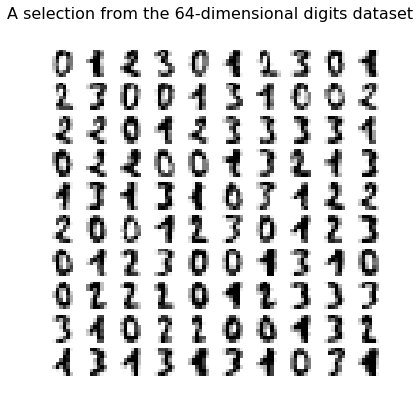

In [3]:
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(X[idx].reshape((8, 8)), cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("A selection from the 64-dimensional digits dataset", fontsize=16)

We conduct experiments on the digits dataset using Laplacian eigenmaps with different values of the number of nearest neighbors $N$ and kernel parameter $t$ and visualize the obtained two-dimensional representations.

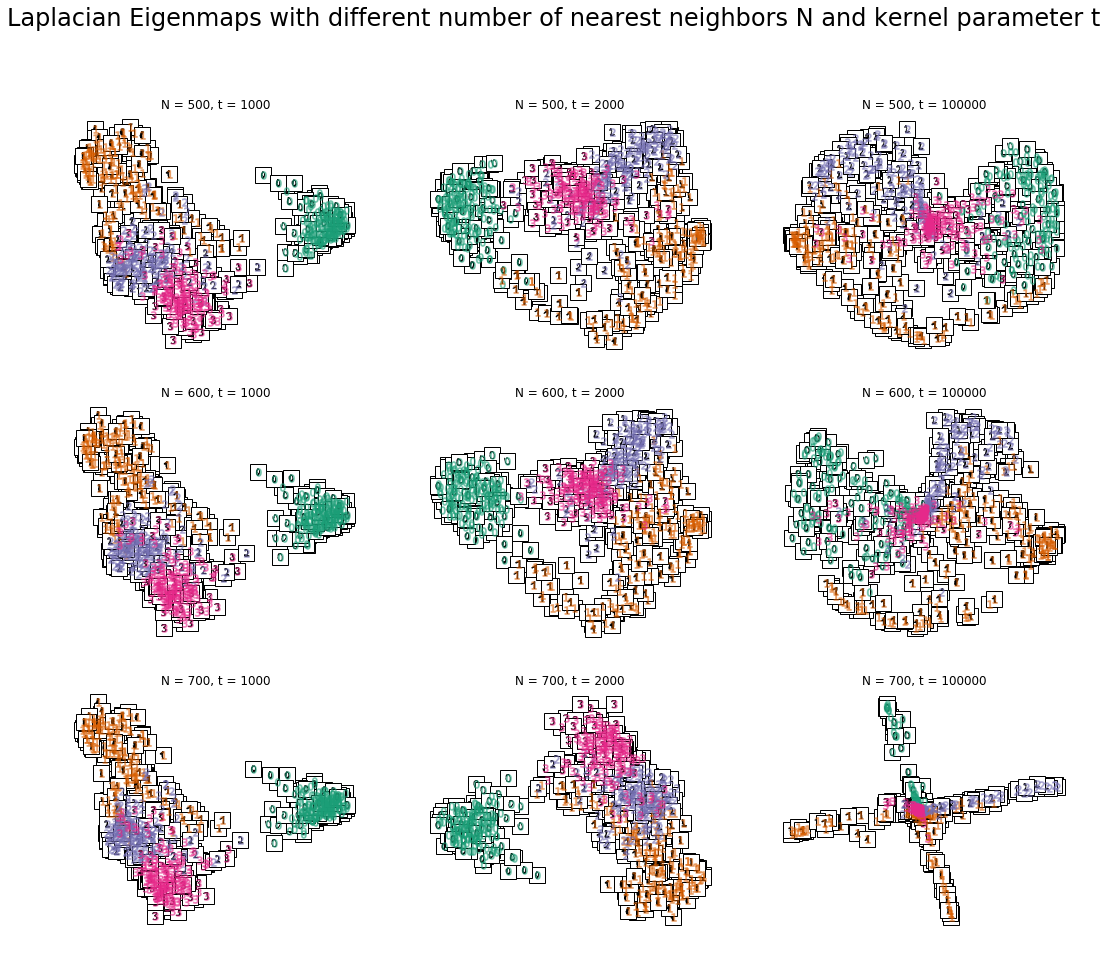

In [6]:
def plot_embedding(embedding, fig, location, num_neighbors, kernel_param):
    ax = fig.add_subplot(location)
    embedding = MinMaxScaler().fit_transform(embedding)
    for digit in digits.target_names:
        ax.scatter(
            *embedding[y == digit].T,
            marker=f"${digit}$",
            s=60,
            color=plt.cm.Dark2(digit),
            alpha=0.425,
            zorder=2,
        )
    shown_images = np.array([[1.0, 1.0]])  # just something big
    for i in range(embedding.shape[0]):
        # plot every digit on the embedding
        # show an annotation box for a group of digits
        shown_images = np.concatenate([shown_images, [embedding[i]]], axis=0)
        imagebox = offsetbox.AnnotationBbox(
            offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r), embedding[i]
        )
        imagebox.set(zorder=1)
        ax.add_artist(imagebox)

    ax.set_title("N = %d, t = %d" % (num_neighbors, kernel_param))
    ax.axis("off")


all_n_neighbors = [500, 600, 700]
all_kernel_param = [1000, 2000, 100000]
location = 331
fig = plt.figure(figsize=(18, 15))
plt.suptitle("Laplacian Eigenmaps with different number of nearest neighbors N and kernel parameter t", fontsize=24)
for i in range(len(all_n_neighbors)):
    for j in range(len(all_kernel_param)):
        lp = LaplacianEigenmaps(X = X, dim = 2, n_neighbors = all_n_neighbors[i], kernel_param = all_kernel_param[j])
        embedding = lp.construct_embeddings()
        plot_embedding(embedding, fig, location, all_n_neighbors[i], all_kernel_param[j])
        location += 1
plt.show()

**Q3(4 points): Discuss the effects of the number of nearest neighbors $N$ and kernel parameter $t$ on the quality of low-dimensional embeddings of handwritten digits generated by laplacian eigenmaps.**